# Building models
So we are finally to the point of actually putting out some models to assess who is the best drafting GM of the last 40 years. I am not making a causal claim, i.e. I am not arguing that because a given GM drafted a player, that this caused the player to become the player he was/is. Rather, this analysis is given the circumstances of a player's career and working from the limited information available at the time of drafting, how well has a GM drafted according to win share. Someone may rightly criticize this analysis for a number of reasons, but the one that I struggle with the most is this:
This analysis ignores the fact that players develop according to their environment, thus crediting a GM, especially one that may have traded the player away after just one season or a GM that only lasted for one or two years of a player's career, with having recognized a player's potential is absurd. To address this criticism it would be good to control for more things, especially the player's coach, but there are countervailing considerations that I think bear mentioning. 
1. A GM is responsible for hiring the coach and generally crafting a team, thus the player's environment is, at some level, determined by the GM;
2. Players are traded for many reasons, but this does not necessarily mean that a GM missed a player's potential, but rather that the GM saw a greater opportunity elsewhere, thus it's still theoretically possible the player would have developed into an equivalent player had he not been traded. A similar argument can be made regarding GM's that were only around for a few years of a player's career; and
3. The interpretation of these results relies upon the limitation that it merely reports which GM has drafted the players with the greatest win share over what was predicted of them. The analysis does not claim that the GM is responsible for this win share, but rather because the GM is good at recognizing talent or out of sheer luck, they have drafted well or not.
Anyway, onto the analysis.

In [1]:
# Needed libraries
library(RCurl)
library(dplyr)
library(ggplot2)
library(tidyr)
library(modelr)
thunder <- c("dodgerblue", "dodgerblue2", "dodgerblue3", "dodgerblue4", "darkorange4", "darkorange3", "darkorange2", "darkorange")

Loading required package: bitops

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked from ‘package:RCurl’:

    complete



In [2]:
# Loading the dataset in R using 'getURL' from RCurl
x <- getURL("https://raw.githubusercontent.com/rvino/blog_data/master/NBA_Data/1976_to_2015_Draftees_edit2.csv")
df <- read.csv(text = x)

# Limiting the dataframe to players picked in the top 60 picks and having played at least 11 games 
newdf <- df %>%
    filter(Games > 10) %>%
    subset(Pk < 61)


## Finding the best GM - taking the residuals
To rank the GMs in terms of player win share, I will be using the residuals from the linear regression. Originally, I had planned to bucket GM picks (since many GM's have so few picks and none have drafted in every draft position) and then to calculate the difference between a GM's draft pick win share and the average win share for that 'bucket' of picks. Adam quickly pointed out that it would simply be easier to just take the individual residuals from the regression rather than trying to bin. 
### What are the residuals?
In running the regression, the regression is drawing a line that predicts a player's win share based on the variables on the right side of the equation (what draft pick number they were, the number of years they've been in the league, whether they attended college, etc.) While some players fall on the line, most do not because the equation of the line cannot perfectly predict every players' win share. The residual is the difference between a player's predicted win share according to the model and a player's actual win share. The residual also represents the portion of a player's win share that is not accounted for by the variables included in the model. The model variables are factors beyond a GM's control at the time of making a pick and thus the regression essentially pulls the influence of these variables out of win share. The residual then is made up of variables that this analysis assumes a GM could account for when drafting. For example, the majority of the residual may be accounted for by how good of a shooter a player is/was, this analysis credits a GM for recognizing a player's shooting ability and that that skill will translate into win share. 
## Going to the analysis
Below are the models that Adam and I developed and are based on the analysis presented in previous posts. I'll discuss the residual issue more below with graphs.

In [3]:
# more dummy variables, as discussed in previous post, adding more dummies for years out from draft
newdf$sixth_year <- factor(with(newdf, ifelse((Draft_Yr != 2010 ), 0, 1)))
newdf$seventh_year <- factor(with(newdf, ifelse((Draft_Yr != 2009 ), 0, 1)))
newdf$eighth_year <- factor(with(newdf, ifelse((Draft_Yr != 2008 ), 0, 1)))
newdf$ninth_year <- factor(with(newdf, ifelse((Draft_Yr != 2007 ), 0, 1)))
newdf$tenth_year <- factor(with(newdf, ifelse((Draft_Yr != 2006 ), 0, 1)))
newdf$eleventh_year <- factor(with(newdf, ifelse((Draft_Yr != 2005 ), 0, 1)))
newdf$twelfth_year <- factor(with(newdf, ifelse((Draft_Yr != 2004 ), 0, 1)))
newdf$thirteenth_year <- factor(with(newdf, ifelse((Draft_Yr != 2003 ), 0, 1)))

# Adding a variable for the Executives draft experinece squared
newdf$experienceSquared <- newdf$Exec_draft_exp^2

Finally the regressions

In [4]:
# Regression for win share
reg <- lm(newdf$Win.Share ~ log(newdf$Pk) + newdf$experienceSquared + newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + newdf$third_year + newdf$fourth_year + newdf$fifth_year + newdf$sixth_year + newdf$seventh_year + newdf$eighth_year + newdf$ninth_year + newdf$tenth_year + newdf$eleventh_year + newdf$twelfth_year + newdf$thirteenth_year + newdf$attend_college)
summary(reg)

# Creating a new column for each pick's residual, i.e. the difference between predicted win share and actual win share
newdf$resid_win_share <- residuals(reg)



Call:
lm(formula = newdf$Win.Share ~ log(newdf$Pk) + newdf$experienceSquared + 
    newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + 
    newdf$third_year + newdf$fourth_year + newdf$fifth_year + 
    newdf$sixth_year + newdf$seventh_year + newdf$eighth_year + 
    newdf$ninth_year + newdf$tenth_year + newdf$eleventh_year + 
    newdf$twelfth_year + newdf$thirteenth_year + newdf$attend_college)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.391 -15.387  -6.208   8.861 204.441 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              72.04548    3.21809  22.388  < 2e-16 ***
log(newdf$Pk)           -15.18327    0.68336 -22.218  < 2e-16 ***
newdf$experienceSquared  -0.04618    0.02152  -2.146 0.031969 *  
newdf$Exec_draft_exp      0.72154    0.40596   1.777 0.075678 .  
newdf$first_year        -25.97661    4.48496  -5.792 8.20e-09 ***
newdf$second_year       -20.90081    3.93927  -5.306 1.26e-07 ***
newdf$third_year 

## What's this table tell us?
Unsurprisingly, where a player was drafted is statistically significant in assessing the player's win share. It's also unsurprising to see that the dummy variables for years after a player was drafted has a statistically significant correlation with the player's win share. What is surprising about the relationship between a player's time in the NBA and his win share is that the statistical significance does not hold up past the sixth year, yet we saw in the previous graphs that win share began dipping if the player had spent less than 11 years in the NBA. Another area I'd be interested to investigate is why a player's expected win share as affected by the time he has been in the NBA drops each year until the sixth when it jumps back up and then starts to decline again. Mainly, I'm curious whether this is related to rookie contract deals, so the uptick in year six may be a sign that only quality players are making it past this point.
## So what's with the residual
As discussed earlier, I'm modeling win share in order to assess how good a GM was at spotting player quality. The R-squared of the model (25%) essentially means that the model predicts about 25% of a player's win share. This isn't great, but given that I'm not including some potentially stronger indicators, such as the player's stats from college or health, it's not terrible. The residual is the difference between a player's predicted win share, as based on the model and represented by the blue line in the graph below, and the player's actual win share, the orange dots. This number is what I'm crediting to a GM for being able to recognize talent in the draft. Again, there are issues with this, such as the coach that potentially developed the player, but I think the results actually line up pretty well with previous work in this area.

### Aside on win share
The way win share is calculated is based on a player's offensive and defensive contributions. The stats available to compile this metric varied from year to year. For our analysis though this was only impacted by a change in the offensive side for one year as it wasn't until 1977 that turnovers became an individually tracked metric, so for 1976 this value was imputed to the stat.

### Aside on attending college
Attending college has a negative correlation win share which surprises me given that the previous analysis showed that players who attended college were likely to have a higher win share. Of course that affect was found after limiting the sample, but here to statistically significant negative correlation seems strange and warrants more analysis and thought as to what this means.

So let's look at the model on a graph to better see the residuals.

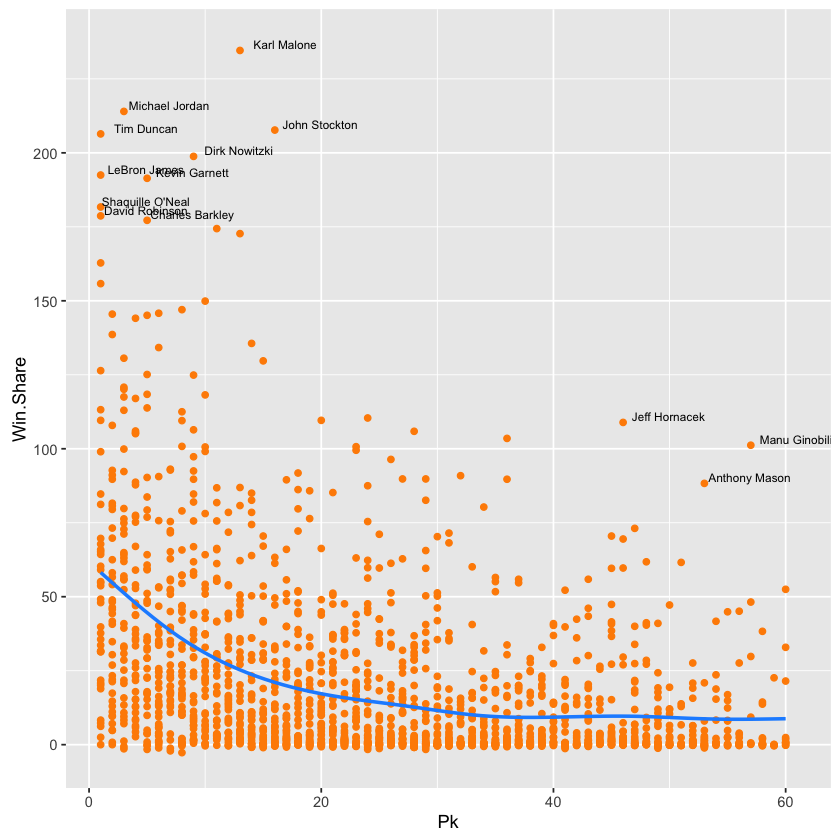

In [27]:
newdf %>%
    ggplot(aes(x = Pk, y = Win.Share))+
        geom_point(aes(x = Pk, y = Win.Share), color = "darkorange")+
        geom_smooth(formula = reg, color = "dodgerblue", se = FALSE)+
        geom_text(data=subset(df, Win.Share > 175 | (Pk > 40 & Win.Share > 75 & Pk < 60)), aes(Pk,Win.Share,label=Player), nudge_y = 2, nudge_x = 3.9, size = 2.5)

The blue line is the line of the model, while the points are the actual win shares of players. The residual is the difference between the blue line and any given orange point.

## Looking at win share per game and VORP
Rather than just looking at a cumulative stat like win share, I thought it would be good to test the model on some standardized metrics. Win share per game is pretty easy to understand as it's just win share distributed across a player's career games. VORP is a more complex stat. It stands for [Value Over Replacement Player][1] and is a per season stat of how many points per 100 possessions a player is better than the average player. Basketball Reference includes VORP as a career cumulative stat though, so for any given player his VORP from every season is summed to give VORP in my table. I decided to look at VORP to essentially link to [this great post][2].
[1]: http://www.basketball-reference.com/about/bpm.html#vorp
[2]: http://polygraph.cool/redraft/

In [29]:
# Regression for win share per game
reg2 <- lm(newdf$WS_per_game ~ log(newdf$Pk) + newdf$experienceSquared + newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + newdf$third_year + newdf$fourth_year + newdf$fifth_year + newdf$attend_college)
summary(reg2)

newdf$resid_ws_pg <- residuals(reg2)


Call:
lm(formula = newdf$WS_per_game ~ log(newdf$Pk) + newdf$experienceSquared + 
    newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + 
    newdf$third_year + newdf$fourth_year + newdf$fifth_year + 
    newdf$attend_college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41067 -0.02758  0.00356  0.03552  0.23080 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.349e-01  6.679e-03  20.202   <2e-16 ***
log(newdf$Pk)           -2.079e-02  1.469e-03 -14.159   <2e-16 ***
newdf$experienceSquared -5.910e-05  4.616e-05  -1.280   0.2006    
newdf$Exec_draft_exp     9.957e-04  8.717e-04   1.142   0.2535    
newdf$first_year        -1.578e-02  9.608e-03  -1.642   0.1007    
newdf$second_year       -2.402e-02  8.425e-03  -2.851   0.0044 ** 
newdf$third_year        -8.280e-03  8.435e-03  -0.982   0.3264    
newdf$fourth_year        7.123e-05  8.106e-03   0.009   0.9930    
newdf$fifth_year         7.167e-03  8.1

In [30]:
# Regression for VORP
reg3 <- lm(newdf$VORP ~ log(newdf$Pk) + newdf$experienceSquared + newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + newdf$third_year + newdf$fourth_year + newdf$fifth_year + newdf$attend_college)
summary(reg3)

newdf$resid_VORP <- residuals(reg3)


Call:
lm(formula = newdf$VORP ~ log(newdf$Pk) + newdf$experienceSquared + 
    newdf$Exec_draft_exp + newdf$first_year + newdf$second_year + 
    newdf$third_year + newdf$fourth_year + newdf$fifth_year + 
    newdf$attend_college)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.977  -5.499  -1.915   1.901  94.624 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             24.025329   1.327285  18.101  < 2e-16 ***
log(newdf$Pk)           -5.559827   0.291832 -19.051  < 2e-16 ***
newdf$experienceSquared -0.013902   0.009172  -1.516 0.129748    
newdf$Exec_draft_exp     0.201444   0.173213   1.163 0.244989    
newdf$first_year        -6.904030   1.909311  -3.616 0.000307 ***
newdf$second_year       -5.350123   1.674178  -3.196 0.001419 ** 
newdf$third_year        -4.780769   1.676071  -2.852 0.004389 ** 
newdf$fourth_year       -3.729222   1.610739  -2.315 0.020713 *  
newdf$fifth_year        -2.990969   1.611450  -1.856 0.063606 .  

## Why the big difference between win share and WS per game?
The model doesn't appear to do a great job of predicting win share per game, with few variables being statistically significant and an R-squared of just 10%. This is likely still due to the fact that a player may play in very few games, have an anomalous impact in those games and thus rack up a solid win share per game, without actually having a solid NBA career. To tease this apart, I'll need to experiment some with dropping more players based on cut-offs in the data on number of games played (such as dropping players with fewer than 100 games to their name). Doing so would likely increase the accuracy of the model. This makes intuitive sense as well since we would expect that as a player plays more games our metrics for measuring his impact on the game are subject to less variance and spurts of random good or bad play.
The model does a better job though of predicting VORP as this stat controls for the amount of time a player gets on the court, thus players with fewer minutes necessarily have a lower VORP. Interestingly, though GM experience was statistically significant in the win share model, it is not in the VORP model. This is another avenue for future analysis as to how strong of an indicator a stat like win share actually is and to explore the differences between win share and VORP. 

## Players beating projected win share and VORP
Now let's look at the top ten players in terms of their residuals for win share and VORP e.g. who are the top players to beat their predicted win share or VORP based on the model.

In [36]:
# Show top 10 in terms of residuals
head(arrange(newdf, desc(resid_win_share)), n = 10)

X,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,⋯,eighth_year,ninth_year,tenth_year,eleventh_year,twelfth_year,thirteenth_year,experienceSquared,resid_win_share,resid_ws_pg,resid_VORP
1508,Karl Malone,14,14,1985,13,UTA,Louisiana Tech University,19,1476,⋯,0,0,0,0,0,0,49,204.4409,0.13029533,94.62424
1499,John Stockton,11,10,1984,16,UTA,Gonzaga University,19,1504,⋯,0,0,0,0,0,0,36,180.8148,0.13884037,59.19939
3495,Michael Jordan,11,14,1984,3,CHI,University of North Carolina,15,1072,⋯,0,0,0,0,0,0,49,161.5772,0.14480421,88.37166
581,Dirk Nowitzki,12,13,1998,9,MIL,0,18,1340,⋯,0,0,0,0,0,0,25,157.6624,0.10925188,53.23120
1219,Reggie Miller,3,5,1987,11,IND,"University of California, Los Angeles",18,1389,⋯,0,0,0,0,0,0,4,143.2340,0.10014040,54.77706
2443,Kevin Garnett,9,15,1995,5,MIN,0,21,1462,⋯,0,0,0,0,0,0,1,143.1157,0.07959362,78.73533
389,Kobe Bryant,15,18,1996,13,NOH,0,20,1346,⋯,0,0,0,0,0,0,256,139.8768,0.08759803,62.67125
1616,Tim Duncan,15,15,1997,1,SAS,Wake Forest University,19,1392,⋯,0,0,0,0,0,0,9,138.3355,0.08257823,67.41325
2994,Charles Barkley,11,11,1984,5,PHI,Auburn University,16,1073,⋯,0,0,0,0,0,0,81,132.5679,0.12132622,80.35375
3331,Paul Pierce,4,10,1998,10,BOS,University of Kansas,18,1318,⋯,0,0,0,0,0,0,4,117.2869,0.08015851,52.74715


In [38]:
# Show top 10 in terms of residuals
head(arrange(newdf, desc(resid_VORP)), n = 10)

X,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,⋯,eighth_year,ninth_year,tenth_year,eleventh_year,twelfth_year,thirteenth_year,experienceSquared,resid_win_share,resid_ws_pg,resid_VORP
1508,Karl Malone,14,14,1985,13,UTA,Louisiana Tech University,19,1476,⋯,0,0,0,0,0,0,49,204.44094,0.13029533,94.62424
3495,Michael Jordan,11,14,1984,3,CHI,University of North Carolina,15,1072,⋯,0,0,0,0,0,0,49,161.57715,0.14480421,88.37166
2183,LeBron James,12,12,2003,1,CLE,0,13,987,⋯,0,0,0,0,0,1,25,112.42465,0.10156262,83.91501
2994,Charles Barkley,11,11,1984,5,PHI,Auburn University,16,1073,⋯,0,0,0,0,0,0,81,132.56790,0.12132622,80.35375
2443,Kevin Garnett,9,15,1995,5,MIN,0,21,1462,⋯,0,0,0,0,0,0,1,143.11569,0.07959362,78.73533
3754,Clyde Drexler,5,10,1983,14,POR,University of Houston,15,1086,⋯,0,0,0,0,0,0,9,107.60501,0.10145499,68.38595
3248,Larry Bird,10,12,1978,6,BOS,Indiana State University,13,897,⋯,0,0,0,0,0,0,9,104.94027,0.11383621,67.77512
1616,Tim Duncan,15,15,1997,1,SAS,Wake Forest University,19,1392,⋯,0,0,0,0,0,0,9,138.33551,0.08257823,67.41325
389,Kobe Bryant,15,18,1996,13,NOH,0,20,1346,⋯,0,0,0,0,0,0,256,139.87681,0.08759803,62.67125
2878,Jason Kidd,6,10,1994,2,DAL,University of California,19,1391,⋯,0,0,0,0,0,0,289,83.88918,0.02360013,61.23947


## Players failing to live up to projected win share and VORP

In [54]:
# Win Share
head(arrange(newdf, resid_win_share), n = 10)

X,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,⋯,eighth_year,ninth_year,tenth_year,eleventh_year,twelfth_year,thirteenth_year,experienceSquared,resid_win_share,resid_ws_pg,resid_VORP
1374,Michael Olowokandi,0,0,1998,1,LAC,University of the Pacific,9,500,⋯,0,0,0,0,0,0,169,-65.39076,-0.11792247,-29.97681
2275,Darko Milicic,0,0,2003,2,DET,0,10,468,⋯,0,0,0,0,0,1,16,-62.14521,-0.08356026,-19.95489
2500,Greg Oden,0,0,2007,1,POR,Ohio State University,3,105,⋯,0,1,0,0,0,0,1,-53.95401,0.04909674,-19.99508
105,Chris Washburn,0,0,1986,3,GSW,North Carolina State University,2,72,⋯,0,0,0,0,0,0,121,-52.58390,-0.15092328,-16.83314
2693,Kwame Brown,0,0,2001,1,WAS,0,12,607,⋯,0,0,0,0,0,0,4,-52.50383,-0.06269150,-24.77261
2087,Jay Williams,0,0,2002,2,CHI,Duke University,1,75,⋯,0,0,0,0,0,0,361,-52.02879,-0.08713606,-16.46245
2515,Nikoloz Tskitishvili,0,0,2002,5,DEN,0,4,172,⋯,0,0,0,0,0,0,1,-49.88431,-0.14140638,-17.36467
828,Anthony Bennett,0,0,2013,1,CLE,"University of Nevada, Las Vegas",3,128,⋯,0,0,0,0,0,0,9,-49.26247,-0.11714149,-18.80598
3198,Ralph Sampson,1,4,1983,1,HOU,University of Virginia,9,456,⋯,0,0,0,0,0,0,64,-49.03218,-0.05714958,-15.32934
1378,Darius Miles,0,0,2000,3,LAC,0,7,446,⋯,0,0,0,0,0,0,225,-46.29708,-0.07472950,-15.51086


In [55]:
# VORP
head(arrange(newdf, resid_VORP), n = 10)

X,Player,All_NBA,All.Star,Draft_Yr,Pk,Team,College,Yrs,Games,⋯,eighth_year,ninth_year,tenth_year,eleventh_year,twelfth_year,thirteenth_year,experienceSquared,resid_win_share,resid_ws_pg,resid_VORP
1374,Michael Olowokandi,0,0,1998,1,LAC,University of the Pacific,9,500,⋯,0,0,0,0,0,0,169,-65.39076,-0.11792247,-29.97681
652,Andrea Bargnani,0,0,2006,1,TOR,0,10,550,⋯,0,0,1,0,0,0,144,-45.14715,-0.08137418,-25.34072
2693,Kwame Brown,0,0,2001,1,WAS,0,12,607,⋯,0,0,0,0,0,0,4,-52.50383,-0.06269150,-24.77261
3145,Michael Beasley,0,0,2008,2,MIA,Kansas State University,8,453,⋯,1,0,0,0,0,0,121,-43.47407,-0.06535455,-22.28746
2084,Eddy Curry,0,0,2001,4,CHI,0,11,527,⋯,0,0,0,0,0,0,324,-27.32172,-0.02488360,-20.43940
2500,Greg Oden,0,0,2007,1,POR,Ohio State University,3,105,⋯,0,1,0,0,0,0,1,-53.95401,0.04909674,-19.99508
2275,Darko Milicic,0,0,2003,2,DET,0,10,468,⋯,0,0,0,0,0,1,16,-62.14521,-0.08356026,-19.95489
144,Adam Morrison,0,0,2006,3,CHA,Gonzaga University,3,161,⋯,0,0,1,0,0,0,81,-43.78151,-0.12629593,-18.88635
828,Anthony Bennett,0,0,2013,1,CLE,"University of Nevada, Las Vegas",3,128,⋯,0,0,0,0,0,0,9,-49.26247,-0.11714149,-18.80598
2556,Yi Jianlian,0,0,2007,6,MIL,0,5,272,⋯,0,1,0,0,0,0,9,-37.75284,-0.07513368,-18.64267


## Why the differences between the two lists of the bottom players?
First, I just want to note that the names on both of these lists generally align with others' analysis of the worst draft picks, which gives me some heart that my analysis is not too far off the mark. Second, I wanted to note Jay Williams presence on the Win Share list, but not on the VORP. Williams only played one season in the NBA before suffering a tragic injury, but in his only season posted a 0.8 Win Share and a -0.1 VORP. I bring this up to point out how VORP is more forgiving of accidents such as Williams, since the stat is standardized and measures a player's variance from a central measure. In contrast, win share is not standardized and thus differences between predicted win share and actual win share can grow at a much faster rate, thus why Jay Williams appears poor in this stat as compared to VORP. 

## So which GM has done the best drafting?
And finally, I get to look at the question I started all this work for, which GM has drafted the best over the last 40 years. I'll look at this for both win share and VORP since both are cumulative stats over a player's career and thus reflect in a sense a GM's ability to draft players that significantly contribute to their team. 

In [74]:
results <- newdf %>%
    group_by(Executive) %>%
    summarise(
        total_ws_resid = sum(as.numeric(resid_win_share), na.rm = TRUE),
        total_VORP = sum(as.numeric(resid_VORP), na.rm = TRUE))
results2 <- newdf %>%
    group_by(Executive, Team) %>%
    summarise(
        total_ws_resid = sum(as.numeric(resid_win_share), na.rm = TRUE),
        total_VORP = sum(as.numeric(resid_VORP), na.rm = TRUE))

## Top by win share

In [75]:
head(arrange(results, desc(total_ws_resid)), n = 10)

Executive,total_ws_resid,total_VORP
Frank Layden,406.6755,147.48539
Jerry West,357.1253,136.64309
Bryan Colangelo,310.0084,74.54097
Gregg Popovich,273.1450,118.84709
Bob Whitsitt,248.2829,145.50296
Bob Bass,214.4695,107.29761
Donnie Walsh,210.2858,42.87542
Jack McCloskey,173.7375,53.16282
Sam Presti,172.6138,57.14420
Stu Inman,160.2859,109.75150


In [76]:
head(arrange(results2, desc(total_ws_resid)), n = 10)

Executive,Team,total_ws_resid,total_VORP
Frank Layden,UTA,406.6755,147.48539
Bryan Colangelo,PHO,313.2403,105.57234
Bob Whitsitt,OKC,275.1840,164.03663
Jerry West,LAL,275.0167,111.93272
Gregg Popovich,SAS,273.1450,118.84709
Donnie Walsh,IND,198.0848,47.26727
Bob Bass,NOH,191.2906,83.69664
Jack McCloskey,DET,188.3282,60.59214
Sam Presti,OKC,172.6138,57.14420
Stu Inman,POR,160.2859,109.75150


## Top by VORP

In [77]:
head(arrange(results, desc(total_VORP)), n = 10)

Executive,total_ws_resid,total_VORP
Frank Layden,406.67547,147.48539
Bob Whitsitt,248.28285,145.50296
Jerry West,357.12527,136.64309
Gregg Popovich,273.14499,118.84709
Stu Inman,160.28587,109.75150
Bob Bass,214.46946,107.29761
Pat Williams,52.65290,96.50553
Isiah Thomas,157.03785,84.21736
Jim Paxson,129.51630,81.62824
Kevin McHale,97.61157,78.84629


In [78]:
head(arrange(results2, desc(total_VORP)), n = 10)

Executive,Team,total_ws_resid,total_VORP
Bob Whitsitt,OKC,275.18396,164.03663
Frank Layden,UTA,406.67547,147.48539
Gregg Popovich,SAS,273.14499,118.84709
Jerry West,LAL,275.01666,111.93272
Stu Inman,POR,160.28587,109.75150
Bryan Colangelo,PHO,313.24035,105.57234
Bob Bass,NOH,191.29057,83.69664
Jim Paxson,CLE,129.51630,81.62824
Kevin McHale,MIN,97.61157,78.84629
Red Auerbach,BOS,102.67212,77.32148


## The Best GMs
Most analysis of GM drafting quality starts at 1989 and the reason cited is that is when the draft switched to a two round format. I need to delve into how this issue affects the analysis, cause I'm not quite sure why instead of basing the draft around rounds, the researchers don't focus on number of draft picks which is easy enough to control for from before 1989. Of course there may be issues with more rounds changing behavior in earlier rounds, but I think the arguments there (something like GM's might be more risk averse with fewer rounds, or that more picks distorted trading of picks?) don't seem especially persuasive. Though I would be interested to do some risk analysis to see if GM's did change tactics in some way after the change in format.

## But the best GM is Frank Layden!!!
A man I have never seen on the list of best GM's because those analysis stop at 1989. Layden was the GM and coach of the Utah Jazz for 9 years before moving solely into the front office and retiring from coaching. From the graph above showing players win share with the model line, it's pretty clear that a huge amount of his success comes from having drafted Karl Malone and John Stockton, two players that vastly exceedeed their predicted VORP and Win Share. Frank's son is currently the GM of the Timberwolves, who also appear to be building a solid team through the draft, so perhaps there's something to this analysis.
As for current GM's, as a proud Thunder fan, I'm happy to see Sam Presti is the only currently serving GM on any of the lists (Popovich gave up being GM in 2002 and Jerry West is in GSW front office, but not GM, though both likely are heavily involved in the drafting process.) 
I've produced two lists from two different datasets, one that groups GM's based on their team and one that looks at the GM throughout his career. This has a pretty significant impact on a GM like West who has been a successful GM at multiple teams, his aggregate score is pretty high, but his individual team score is lower. It also impacted Bob Whitsitt negatively as his time as Portland's GM in the late 90s early 00s actually brings down his VORP score.

## Congrats Frank Layden on Finally Being Recognized!

## Qualities of the player contributing to win share & VORP
This final analysis was a little ad hoc thought experiment between me and Adam. We were interested in looking at what attribute of a player's game contributed most to their win share and VORP. Win share and VORP are aggregate functions of player's skill (such as shooting percentage, assists, etc), so these personal stats should predict win share and VORP at high levels. What Adam and I wondered was whether regressing these stats on the residuals of win share and VORP we might see which stat contributed most to a player's win share/VORP that we are attributing to the GM's ability to foresee in drafting the player. 
Our thought is that whichever stat contributes the most to the residual may be an indicator to GM's as to what they might look for when drafting a player. This would only hold true if (1) a player's stats from before being in the NBA reliably correlate with his stats in the NBA, so if you were a good three-point shooter in college then your a good three-point shooter in the NBA and (2) if we believe that win share and VORP do a good job of conveying player quality. I think both of these assumptions are pretty reasonable.

In [80]:
# using residuals to see which is the biggest factor remaining in predicting player quality.
reg4 <- lm(as.numeric(newdf$resid_win_share) ~ newdf$Points.per.Game + newdf$TRB.per.game  + newdf$Assits.per.Game + newdf$attend_college + newdf$FG_Percentage + newdf$FT_Percentage + newdf$TP_Percentage)
summary(reg4)


Call:
lm(formula = as.numeric(newdf$resid_win_share) ~ newdf$Points.per.Game + 
    newdf$TRB.per.game + newdf$Assits.per.Game + newdf$attend_college + 
    newdf$FG_Percentage + newdf$FT_Percentage + newdf$TP_Percentage)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.813 -10.907  -0.263   9.537 154.539 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -44.2744     5.9604  -7.428 1.69e-13 ***
newdf$Points.per.Game   1.1342     0.2021   5.613 2.30e-08 ***
newdf$TRB.per.game      2.9608     0.3751   7.892 5.10e-15 ***
newdf$Assits.per.Game   3.8009     0.4490   8.465  < 2e-16 ***
newdf$attend_college    1.2663     1.6898   0.749  0.45372    
newdf$FG_Percentage    25.1306    10.5419   2.384  0.01723 *  
newdf$FT_Percentage     6.6067     5.4738   1.207  0.22760    
newdf$TP_Percentage    11.3059     4.0599   2.785  0.00541 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.31 on

In [81]:
reg5 <- lm(newdf$resid_VORP ~ newdf$Points.per.Game + newdf$TRB.per.game  + newdf$Assits.per.Game + newdf$attend_college + newdf$FG_Percentage + newdf$FT_Percentage + newdf$TP_Percentage)
summary(reg5)


Call:
lm(formula = newdf$resid_VORP ~ newdf$Points.per.Game + newdf$TRB.per.game + 
    newdf$Assits.per.Game + newdf$attend_college + newdf$FG_Percentage + 
    newdf$FT_Percentage + newdf$TP_Percentage)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.592  -5.022   0.135   4.090  76.101 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.72844    2.68297  -1.762   0.0782 .  
newdf$Points.per.Game  0.35710    0.09095   3.926 8.95e-05 ***
newdf$TRB.per.game     1.24810    0.16886   7.391 2.22e-13 ***
newdf$Assits.per.Game  2.21250    0.20213  10.946  < 2e-16 ***
newdf$attend_college   0.29212    0.76063   0.384   0.7010    
newdf$FG_Percentage   -6.24547    4.74522  -1.316   0.1883    
newdf$FT_Percentage   -5.41237    2.46391  -2.197   0.0282 *  
newdf$TP_Percentage    2.55358    1.82750   1.397   0.1625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.59 on 1803 degrees of f

## What should GM's look for?
The R-squareds are lower than I would have expected, but I suppose this points to win share/VORP being fairly comprehensive stats. It would be interesting to include physical attributes and position of the player to see how much these things figure in, especially given that the NFL is obsessed with these metrics. Unsurprisingly, points per game, TRB (rebounding) and assists per game are all statistically significant. These are the main offensive stats in basketball and are the main factors in both win share and VORP. The most interesting part to those three though is that assists per game get you the biggest bang for your buck and point to the importance of being able to get others to score in winning games. This assessment is pretty intersting to me given that I recently read [this article][1] on the greatness, but failures of Chris Paul. Anyway, just a little thought on what GM's should look for, players that can create for others.

I do want to note as well that it's a little concerning that FG percentage and FT percentage are negatively correlated with VORP. Maybe this is because of particularities of the stat?

## Moving on
Well this concludes my NBA draft analysis! I hope I provided some unique insights and provided some ideas for areas of more research, I know for myself that I could definitely keep analyzing this data and adding to it, but think it's better for me to start on another project and try and expand my skill set in other areas.
[1]: http://fivethirtyeight.com/features/the-chris-paul-conundrum/